In [1]:
#Soham Khanna - Network Intrusion
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv(r'E:\Projects\Network_Intrusion_Detection\Network_Intrusion_Test_data.csv')

# Display basic dataset overview
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Display keys, shape, size, mean, and standard deviation
print("\nColumns in the dataset:")
print(data.columns)
print("\nShape of the dataset:")
print(data.shape)
print("\nTotal number of elements in the dataset:")
print(data.size)
print("\nMean of the numerical columns:")
print(data.mean(numeric_only=True))
print("\nStandard deviation of numerical columns:")
print(data.std(numeric_only=True))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13

In [ ]:
# Define target and features
target_column = 'protocol_type'
features = data[['service', 'flag']]
target = data[target_column]

print("Target Column: ", target_column)
print("Features Shape: ", features.shape)
print("Target Shape: ", target.shape)

Target Column:  protocol_type
Features Shape:  (22544, 2)
Target Shape:  (22544,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for each ratio
splits = {
    "60_40": train_test_split(features, target, test_size=0.4, random_state=42),
    "70_30": train_test_split(features, target, test_size=0.3, random_state=42),
    "80_20": train_test_split(features, target, test_size=0.2, random_state=42)
}

# Print shapes of each split
for split_name, (train_X, test_X, train_y, test_y) in splits.items():
    print(f"{split_name} - Train Shape: {train_X.shape}, Test Shape: {test_X.shape}")


60_40 - Train Shape: (13526, 2), Test Shape: (9018, 2)
70_30 - Train Shape: (15780, 2), Test Shape: (6764, 2)
80_20 - Train Shape: (18035, 2), Test Shape: (4509, 2)


<ipython-input-5-104d5a2d2f08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[:, 'service_encoded'] = pd.factorize(features['service'])[0]
<ipython-input-5-104d5a2d2f08>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[:, 'flag_encoded'] = pd.factorize(features['flag'])[0]


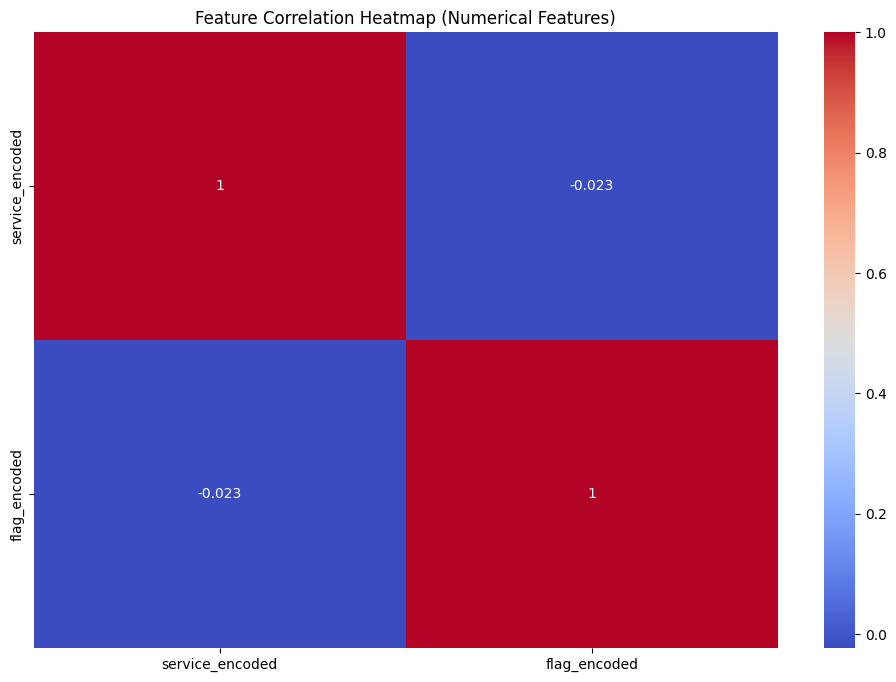

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Encoding categorical features into numerical form
features.loc[:, 'service_encoded'] = pd.factorize(features['service'])[0]
features.loc[:, 'flag_encoded'] = pd.factorize(features['flag'])[0]

# Selecting numerical features (including the encoded ones) for correlation analysis
numerical_features = features.select_dtypes(include=['number'])

# Plotting a heatmap for correlations among numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap (Numerical Features)")
plt.show()


Label Encoding applied to categorical features.
Accuracy: 0.9554224883566201
Confusion Matrix:
 [[3405   11    3   60]
 [  28   50   13    4]
 [  14    3   69   20]
 [  31    1   13  784]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3479
           1       0.77      0.53      0.62        95
           2       0.70      0.65      0.68       106
           3       0.90      0.95      0.92       829

    accuracy                           0.96      4509
   macro avg       0.84      0.78      0.80      4509
weighted avg       0.95      0.96      0.95      4509



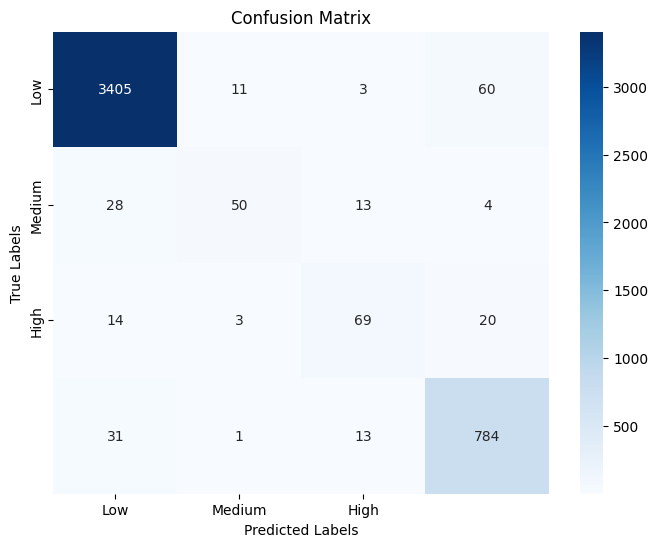

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define target and features
target_column = data.columns[-1]  # Update if necessary
features = data.drop(columns=[target_column])
target = data[target_column]

# Apply Label Encoding to categorical columns before splitting the data
for col in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
print("Label Encoding applied to categorical features.")

# Binning the target into discrete categories
# Example: Create 3 bins (Low, Medium, High)
target_bins = np.digitize(target, bins=np.linspace(target.min(), target.max(), 4)) - 1
# Binning creates 0, 1, 2 for the categories: Low, Medium, High

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(features, target_bins, test_size=0.2, random_state=42)

# Initialize the KNN model using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(train_X, train_y)

# Make predictions
y_pred = knn.predict(test_X)

# 1. Performance Analysis: Accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

# 2. Confusion Matrix
conf_matrix = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 3. Classification Report
class_report = classification_report(test_y, y_pred)
print("Classification Report:\n", class_report)

# Optional: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
